In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# import model for regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
df = pd.read_csv('googleplaystore.csv')

# dropping 'Last Updated', 'Current Ver' and 'Android Ver' columns
# df.drop(columns=['Last Updated', 'Current Ver', 'Android Ver', 'Content Rating'], inplace=True)

impute = IterativeImputer(estimator=XGBRegressor(), max_iter=100, random_state=42)
df['Rating'] = impute.fit_transform(df[['Rating']])

# drop the rows not ending with 'M' or 'k' or 'Varies with device'
size_pattern = r'(\d+M|\d+k|Varies with device)$'
df = df[df['Size'].str.match(size_pattern)]

def convert_size(convertings):
    if 'M' in convertings:
        return pd.to_numeric(convertings.replace('M', '')) * 1024
    elif 'k' in convertings:
        return pd.to_numeric(convertings.replace('k', ''))
    elif pd.isna(convertings):
        return np.nan
    elif 'Varies with device' in convertings:
        return np.nan
    else:
        return pd.to_numeric(convertings)
    
df['Size'] = df['Size'].apply(convert_size)

# TODO: impute the missing values in the 'Size' column

df['Size'] = df['Size'].fillna(df['Size'].mean())

def convert(convertings):
    return pd.to_numeric(convertings.replace(',', '').replace('+', ''))
    
df['Installs'] = df['Installs'].apply(convert)

# dealing with the 'Price' column
def convertings(convert):
    if convert == '0':
        return pd.to_numeric(convert.replace('0', '0'))
    elif '$' in convert:
        return pd.to_numeric(convert.replace('$', ''))

df['Price'] = df["Price"].apply(convertings)

# dealing with the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(lambda x: pd.to_numeric(x.replace("'", '') if "'" in x else x))

# output df to csv
df.to_csv('googleplaystore_cleaned.csv', index=False)

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.000000,10000,Free,0.0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.000000,500000,Free,0.0,Art & Design;Pretend Play
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.000000,50000000,Free,0.0,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19456.000000,50000,Free,0.0,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29696.000000,1000000,Free,0.0,Art & Design
...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582.000000,100000,Free,0.0,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Books & Reference
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.000000,5000,Free,0.0,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,33115.879697,1000,Free,0.0,Books & Reference


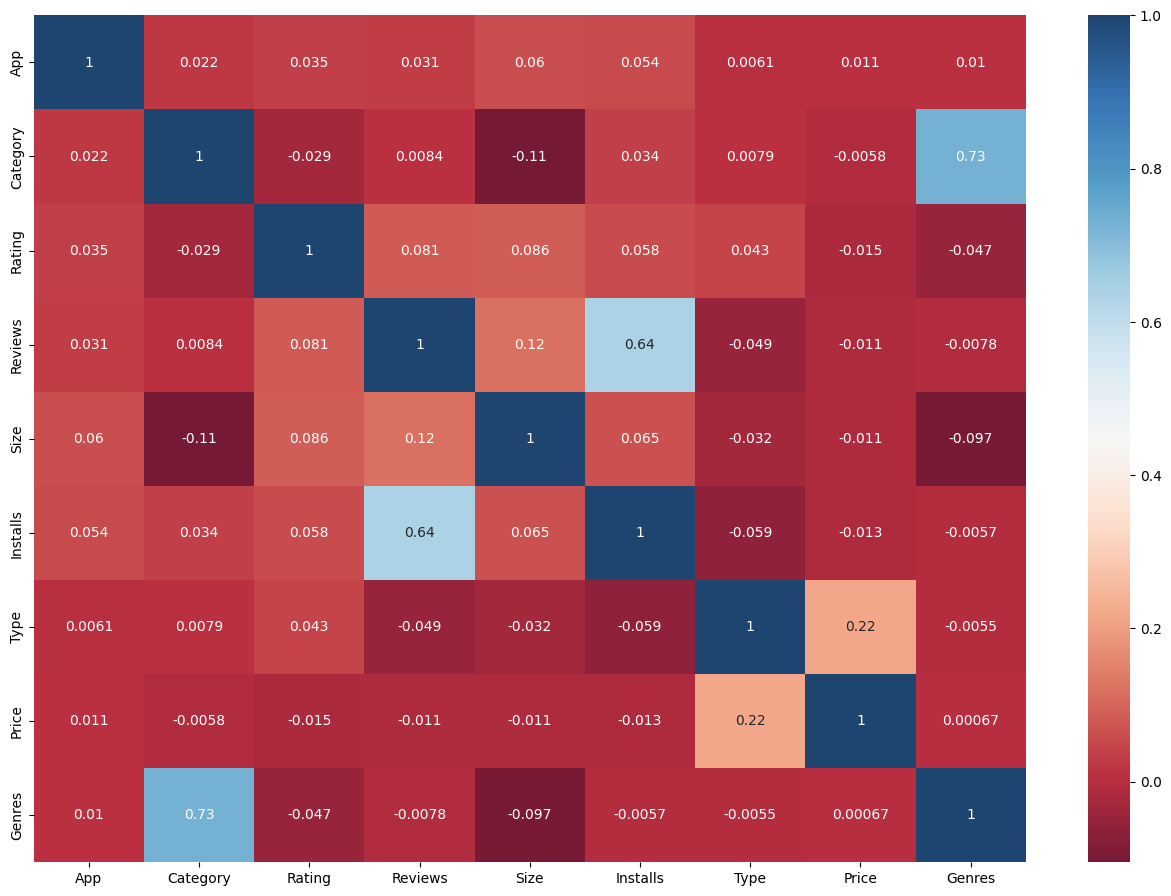

In [10]:
# Correlation Matrix
# Make a copy of the dataframe to avoid modifying the original data
df2 = df.copy()

# Convert categorical columns to numerical using label encoding
# Iterate over categorical columns and apply label encoding
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])

# Calculate correlation matrix
correlation_matrix = df2.corr()

# Sort correlation features
sort_corr_features = correlation_matrix.index 

# Plot correlation matrix
plt.figure(figsize=(16, 11))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.9, square=False)
plt.show()